Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


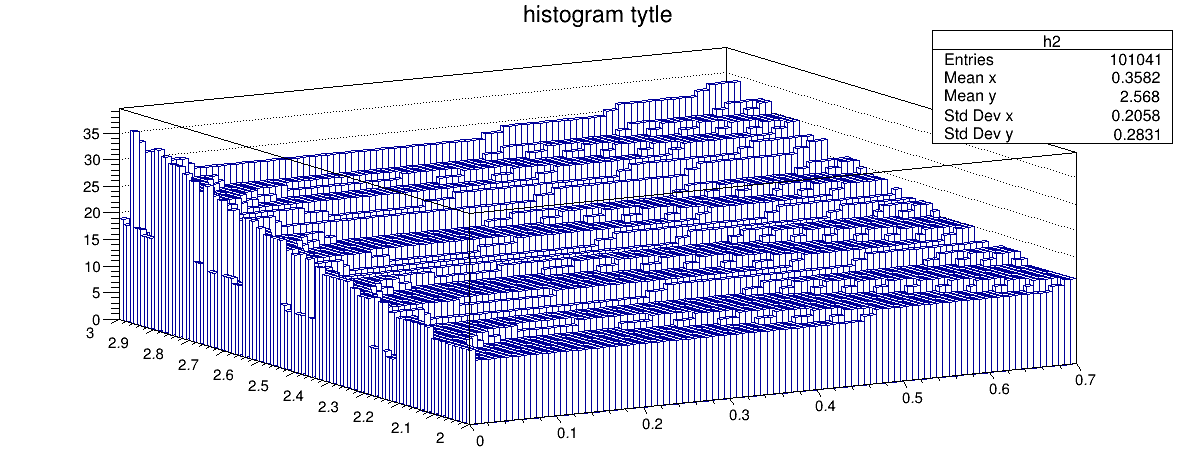

In [3]:
h2 = TH2F('h2', 'histogram tytle', 100, 0, 0.7, 100, 2, 3);
for i in range(100):
    for j in range(100):
        for _ in range(int(f([0.001+0.7*i/100.0, 2.0+j/100.0],[]))):
            h2.Fill(0.001+0.7*i/100.0, 2+j/100.0);

c = ROOT.TCanvas("myCanvasName","The Canvas Title", 1200, 500)
h2.Draw('lego')
c.Draw();

In [1]:
import sys, ROOT
from ROOT import gRandom, TCanvas, TFormula, TF1,TF2, TH1F, TH2F, TStopwatch
from tqdm import tqdm_notebook as tqdm
import numpy as np

ax = 0
bx = 0.7
ay = 2
by = 3
expect = 7.4523

def f(x, p): return np.exp(x[0]+x[1])/(1+x[1]*np.sqrt(x[0])/2)

Welcome to JupyROOT 6.16/00


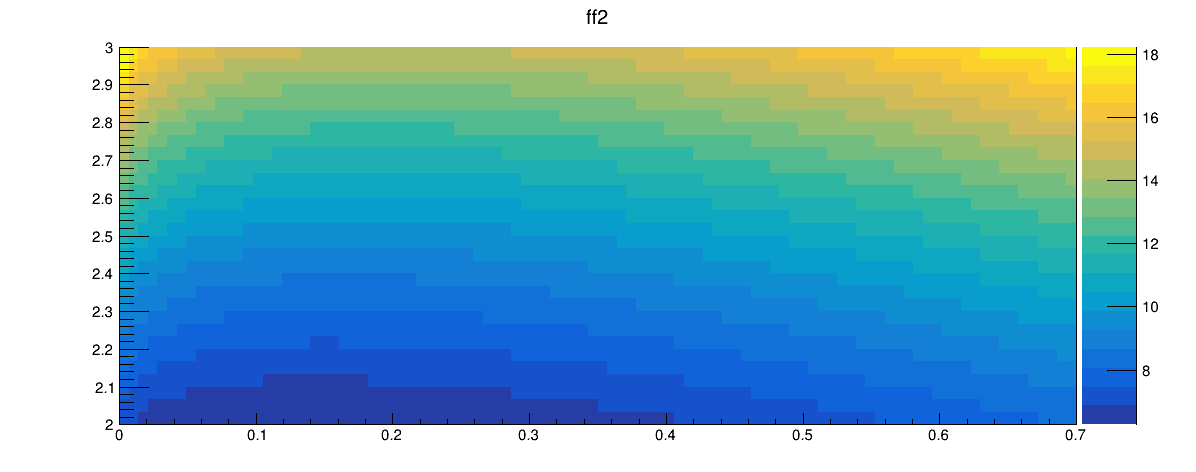

In [114]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title", 1200, 500)
ff = TF2("ff2", f, 0.0, 0.7, 2, 3, 1)
ff.SetNpx(100)
ff.Draw("colz")
c.Draw();

In [4]:
N_ = 10000
temp = 1000

integral = 0
std = 0
cur = 0
cur_std = 0
arr = np.zeros(N_)

print('N,      integral,             std,                 current,      current std')
for N in range (1, N_+1):
    if (N%temp==0):
        std = np.sqrt((np.mean(arr[:N]**2)-np.mean(arr[:N])**2)/N)
        cur_std = np.sqrt((np.mean(arr[N-temp:N]**2)-np.mean(arr[N-temp:N])**2)/temp)
        print(N, integral/N, std, cur/temp, cur_std)
        cur = 0
        
    sample_x = gRandom.Uniform(ax, bx)
    sample_y = gRandom.Uniform(ay, by)
    sample = (bx-ax)*(by-ay)*f([sample_x, sample_y], 0)
    integral += sample
    cur += sample
    arr[N-1] = f([sample_x, sample_y], 0)*((bx-ax)*(by-ay))

N,      integral,             std,                 current,      current std
(1000, 7.4038423577587285, 0.05881446927521095, 7.4038423577587285, 0.05881446927521095)
(2000, 7.467290534580937, 0.04181040335744369, 7.530738711403167, 0.05984897725652673)
(3000, 7.467899034107953, 0.03434170992892694, 7.469116033161969, 0.06058613936348586)
(4000, 7.445937707574233, 0.029585049177202356, 7.3800537279730944, 0.0586392924444009)
(5000, 7.457226481971845, 0.026348737260961604, 7.502381579562322, 0.05831046001521067)
(6000, 7.453365734339499, 0.024112611724439514, 7.434061996177817, 0.060182683372566825)
(7000, 7.440809705861224, 0.02237875339704808, 7.365473534991489, 0.0604435330709266)
(8000, 7.441124857457536, 0.02090552398873623, 7.443330918631835, 0.05903262569803435)
(9000, 7.443384669548866, 0.019723094401399136, 7.461463166279589, 0.05993154592712794)
(10000, 7.442673046222649, 0.018712296502404826, 7.436268436286839, 0.059660527431161674)


In [116]:
def f_2(x, p): return np.exp(x[0]+x[1])/(1+x[1]*np.sqrt(x[0])/2)-10*x[1]

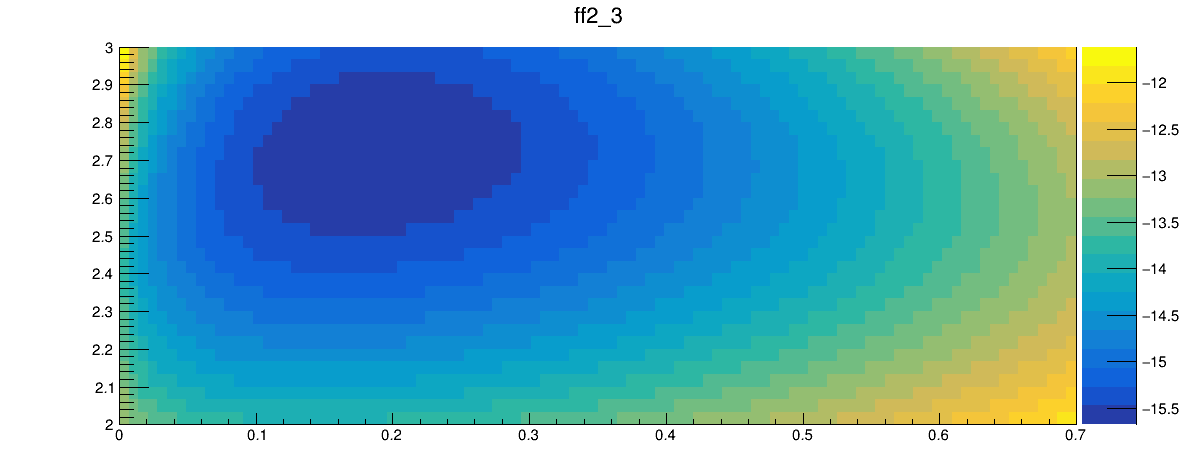

In [120]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title", 1200, 500)
ff = TF2("ff2_3", f_2, 0.0, 0.7, 2, 3, 1)
ff.SetNpx(100)
ff.Draw("colz")
c.Draw();

In [127]:
N_ = 10000
temp = 1000

analitic = (bx-ax)*(by-ay)*10/2*(by*by-ay*ay)
integral = 0
std = 0
cur = 0
cur_std = 0
arr = np.zeros(N_)

print('N,      integral,             std,                 current,      current std')
for N in range (1, N_+1):
    if (N%temp==0):
        std = np.sqrt((np.mean(arr[:N]**2)-np.mean(arr[:N])**2)/N)
        cur_std = np.sqrt((np.mean(arr[N-temp:N]**2)-np.mean(arr[N-temp:N])**2)/temp)
        print(N, integral/N+analitic, std, cur/temp+analitic, cur_std)
        cur = 0
        
    sample_x = gRandom.Uniform(ax, bx)
    sample_y = gRandom.Uniform(ay, by)
    sample = (bx-ax)*(by-ay)*f_2([sample_x, sample_y], 0)
    integral += sample
    cur += sample
    arr[N-1] = f_2([sample_x, sample_y], 0)*((bx-ax)*(by-ay))

N,      integral,             std,                 current,      current std
(1000, 7.454481361999042, 0.021943469057376295, 7.454481361999042, 0.021943469057376295)
(2000, 7.4451539372653475, 0.01459757188697262, 7.4358265125316745, 0.021722060009757304)
(3000, 7.448322356698149, 0.011644498373213795, 7.454659195563838, 0.021650410450926003)
(4000, 7.453839166314971, 0.009910245932576481, 7.470389595165411, 0.02123294440613324)
(5000, 7.450353044411507, 0.008738060035861285, 7.4364085567976534, 0.020937135231651326)
(6000, 7.449253487689466, 0.007982062003385814, 7.443755704079226, 0.022009482773898314)
(7000, 7.4486031111297315, 0.007381124138400119, 7.444700851771129, 0.02183698939717108)
(8000, 7.449951327763069, 0.006911429713413664, 7.459388844196603, 0.02205491602771327)
(9000, 7.4515894150609885, 0.006507334265460567, 7.464694113444242, 0.021752845112470862)
(10000, 7.4511845217798935, 0.006151655860371418, 7.447540482250034, 0.02131638215447689)


In [128]:
analitic

17.5